In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

# experiment: dataset size vs accuracy

In [2]:
experiment_name = "title_and_description"

In [3]:
results = pd.read_csv(f"../results/{experiment_name}.csv")

In [4]:
results.shape

(10, 18)

In [5]:
results

,N,num_train_classes,num_test_classes,mean_num_samples_per_class,median_num_samples_per_class,train_accuracy,val_accuracy,test_accuracy,train_f1_weighted,val_f1_weighted,test_f1_weighted,train_f1_macro,val_f1_macro,test_f1_macro,model__C,vectorizer__max_features,vectorizer__ngram_range,min_samples_per_class
0,1000,21,21,47.619048,43.0,0.765495,0.529991,0.497162,0.751204,0.499525,0.449940,0.585829,0.367830,0.350819,1,500,"(1, 2)",0
1,2000,21,21,95.238095,63.0,0.723247,0.613007,0.525543,0.702675,0.576359,0.477959,0.555681,0.421774,0.373355,1,500,"(1, 2)",0
2,3000,21,21,142.857143,96.0,0.748500,0.629333,0.547245,0.727654,0.591281,0.505601,0.578066,0.425214,0.423049,1,1000,"(1, 2)",0
3,4000,21,21,190.476190,114.0,0.786375,0.661258,0.568948,0.769702,0.627733,0.531392,0.632830,0.476548,0.450469,1,1000,"(1, 1)",0
4,5000,22,22,227.272727,136.5,0.795900,0.675403,0.538839,0.783946,0.654140,0.490180,0.642824,0.521282,0.446482,1,1000,"(1, 1)",0
5,6000,22,22,272.727273,168.0,0.791333,0.662500,0.558182,0.780019,0.642952,0.516254,0.654319,0.507043,0.466750,1,1000,"(1, 1)",0
6,7000,22,22,318.181818,205.5,0.806714,0.675857,0.594105,0.796835,0.654987,0.561360,0.709826,0.545772,0.504622,1,2000,"(1, 2)",0
7,8000,22,22,363.636364,241.0,0.789062,0.676370,0.600860,0.779035,0.657868,0.576167,0.710887,0.575386,0.514029,1,1000,"(1, 1)",0
8,9000,22,22,409.090909,283.0,0.819333,0.689000,0.636475,0.810617,0.671540,0.616077,0.746740,0.589559,0.568473,1,2000,"(1, 1)",0
9,10000,22,22,454.545455,305.5,0.822100,0.705301,0.648142,0.813358,0.688962,0.627736,0.745478,0.607032,0.578346,1,2000,"(1, 1)",0


## Analyse data set size vs accuracy

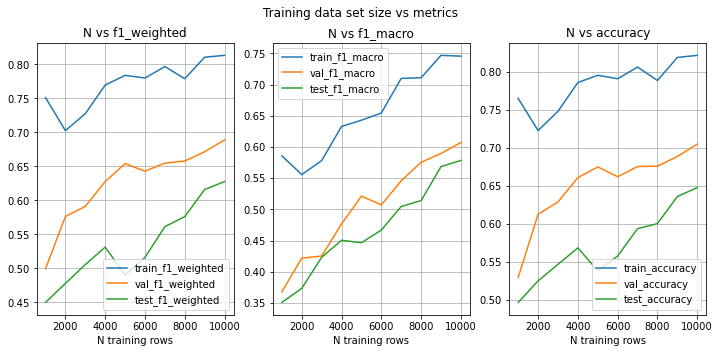

In [6]:
def plot_metric(results: pd.DataFrame, metric_name: str, ax: plt.Axes = None) -> plt.Axes:
    prefixes = ["train", "val", "test"]
    columns = [f"{prefix}_{metric_name}" for prefix in prefixes]
    ax = results.set_index("N")[columns].plot(title=f"N vs {metric_name}", ax=ax)
    ax.set_xlabel("N training rows")
    ax.grid()
    return ax

metric_names = ["f1_weighted", "f1_macro", "accuracy"]
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharex=True)
fig.suptitle("Training data set size vs metrics")
for i, metric_name in enumerate(metric_names):
    plot_metric(results, metric_name, axes[i])

* metrics grow almost linearly with N increasing
* there is significant overfitting

Text(0, 0.5, 'delta(test_accuracy)')

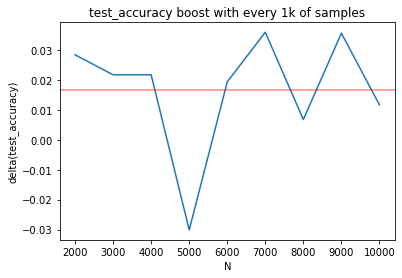

In [7]:
df = results.set_index("N")["test_accuracy"].diff(1)
df.plot(title="test_accuracy boost with every 1k of samples")
plt.axhline(df.mean(), c="red", alpha=0.5)
plt.ylabel("delta(test_accuracy)")

In [8]:
average_boost = results.set_index("N")["test_accuracy"].diff(1).mean()
print(f"On average, every 1k samples adds {int(round(average_boost * 100))}% of accuracy")

On average, every 1k samples adds 2% of accuracy


## Analyse number of features vs number of rows

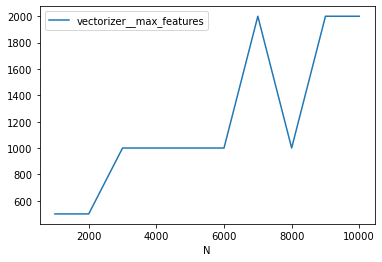

In [9]:
results.plot("N", "vectorizer__max_features")

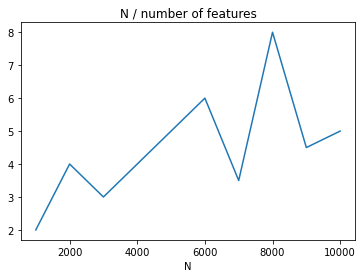

In [10]:
foo = (results["N"] / results["vectorizer__max_features"])
foo.index = results["N"]
foo.plot(title="N / number of features")

In [11]:
n_features_per_record = (results["N"] / results["vectorizer__max_features"]).mean()
print(f"seems that {round(n_features_per_record)} is the optimal ratio for `number of rows / number of features`")

seems that 4 is the optimal ratio for `number of rows / number of features`
